<a href="https://colab.research.google.com/github/marcelozanchetta/EDS104/blob/main/Lab4_Atividade_Dados_Exploratorios_Agrupamento_Particional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório 4 - Atividade**




Essa atividade explora algoritmo de agrupamento baseado em particionamento dos dados com a Linguagem Python. **Essa atividade será desenvolvida em grupo com  três estudantes.**

* O algoritmo de agrupamento particional têm como proposito descobrir partições de um conjunto de objetos usando determinados critérios por processos iterativos.
* Este algoritmo explora um conjunto de centróides como semente para os agrupamentos, atribuem objetos a esses centros provisórios e recompõem esses centróides e os agrupamentos correspondentes à medida que tentam otimizar os critérios de agrupamento.

Nessa atividade vamos explorar o algoritmo k-means para investigação do conjunto de dados.

Referência para exemplificar o uso do algoritmo: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

# **Algoritmo k-means**

O algoritmo de agrupamento k-means representa cada agrupamento pelo seu centróide de agrupamento correspondente. O algoritmo divide os dados de entrada em k clusters separados, aplicando iterativamente os dois passos seguintes:

* Formar k clusters, atribuindo cada instância ao seu centróide mais próximo;
* Recalcular o centróide de cada cluster.

Nesta seção, vamos avaliar o agrupamento k-means num exemplo de um conjunto de dados de classificações de filmes.

In [ ]:
# Construção de um base de dados de filmes
import pandas as pd

ratings = [['João',5,5,2,1],['Maria',4,5,3,2],['Pedro',4,4,4,3],['Elisa',2,2,4,5],['Antônio',1,2,3,4],['Francisco',2,1,5,5]]
titles = ['Usuário','Tubarão','Star Wars','Exorcista','A Profecia']

movies = pd.DataFrame(ratings,columns=titles)
movies

Verificar se há valores ausentes nos dados para não comprometer as anállises do modelo.

In [ ]:
movies.isna().sum()

Neste conjunto de dados de exemplo, os primeiros 3 usuários gostam de filmes de ação (Tubarão e Star Wars), enquanto os últimos 3 usuários gostam de filmes de terror (Exorcista e Profecia).

* O objetivo é aplicar o agrupamento k-means aos utilizadores para identificar grupos de usuários com preferências de filmes semelhantes.

* Aqui é apresentado a aplicação do agrupamento k-means (com k=2) nos dados de classificação de filmes. Temos de remover primeiro a coluna "usuário" antes de aplicar o algoritmo de agrupamento (atributo nominal).

A atribuição do agrupamento para cada usuário é apresentada como um objeto de quadro de dados.

In [ ]:
# biblioteca para trabalhar com K_means
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn import cluster

# retirar o atributo usuário
data = movies.drop('Usuário',axis=1)
# define a parametrização do k-means
k_means = cluster.KMeans(n_clusters=2, n_init=10, max_iter=50, random_state=1)

# calcula os clusters
k_means.fit(data)

labels = k_means.labels_
pd.DataFrame(labels, index=movies.Usuário, columns=['Cluster ID'])

In [ ]:
from matplotlib import pyplot as plt
inputs = movies.drop(['Usuário','Tubarão','Star Wars',],axis='columns')

plt.scatter(inputs['Exorcista'],movies['A Profecia'])
plt.xlabel('Exorcista')
plt.ylabel('A Profecia')

In [ ]:
# Obter os rótulos dos clusters para cada ponto
predicted_labels = k_means.labels_

# Imprimir os labels
print("Os rótulos de clusters preditos:", predicted_labels)

Os rótulos de clusters preditos: [1 1 1 0 0 0]


In [ ]:
inputs['group'] = predicted_labels
inputs.head()

movies1 = inputs[inputs.group==0]
movies2 = inputs[inputs.group==1]

plt.scatter(movies1['Exorcista'],movies1['A Profecia'],color='blue')
plt.scatter(movies2['Exorcista'],movies2['A Profecia'],color='red')

plt.xlabel('Exorcista')
plt.ylabel('A Profecia')

O algoritmo de agrupamento k-means atribui os primeiros três usuários a um agrupamento e os últimos três usuários ao segundo agrupamento. Os resultados são consistentes com as nossas expectativas. Também podemos apresentar o centróide para cada um dos dois grupos.

In [ ]:
# coordenadas ao cluster
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

Observe que o cluster 0 tem taxas mais elevadas para os filmes de terror, enquanto o cluster 1 tem taxas mais elevadas para o filme de ação. Os centróides de agrupamento podem ser aplicados à outros usuários para determinar as suas atribuições de agrupamento.

In [ ]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['Paulo','Kim','Lisa','Thiago','Bernardo']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

Para determinar o número de agrupamentos nos dados, podemos aplicar o k-means com um número variável de agrupamentos, de 1 a 6, e calcular a soma dos erros quadrados (SSE) correspondentes, como mostra o exemplo abaixo. A "curvatura" no gráfico de SSE versus número de clusters pode ser utilizado para estimar o número de clusters.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, n_init=10)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Número de clusters')
plt.ylabel('SSE')

---
# **Exercicios**
---

#**Conjunto de dados de sementes**

O grupo examinado incluiu grãos pertencentes a três variedades diferentes de trigo: Kama, Rosa e Canadiano, com 70 elementos cada, seleccionados aleatoriamente para a experiência.
* A visualização de alta qualidade da estrutura interna do grão foi detectada utilizando uma técnica de raios X. Esta técnica não é destrutiva e é consideravelmente mais barata do que outras técnicas de imagem mais sofisticadas, como a microscopia de varredura ou a tecnologia laser.
* As imagens foram registadas em filmes de raios X KODAK de 13 x 18 cm. Os estudos foram realizados com grãos de trigo colhidos em colheitadeiras, provenientes de campos experimentais, explorados no Instituto de Agrofísica da Academia de Ciências, em Lublin.

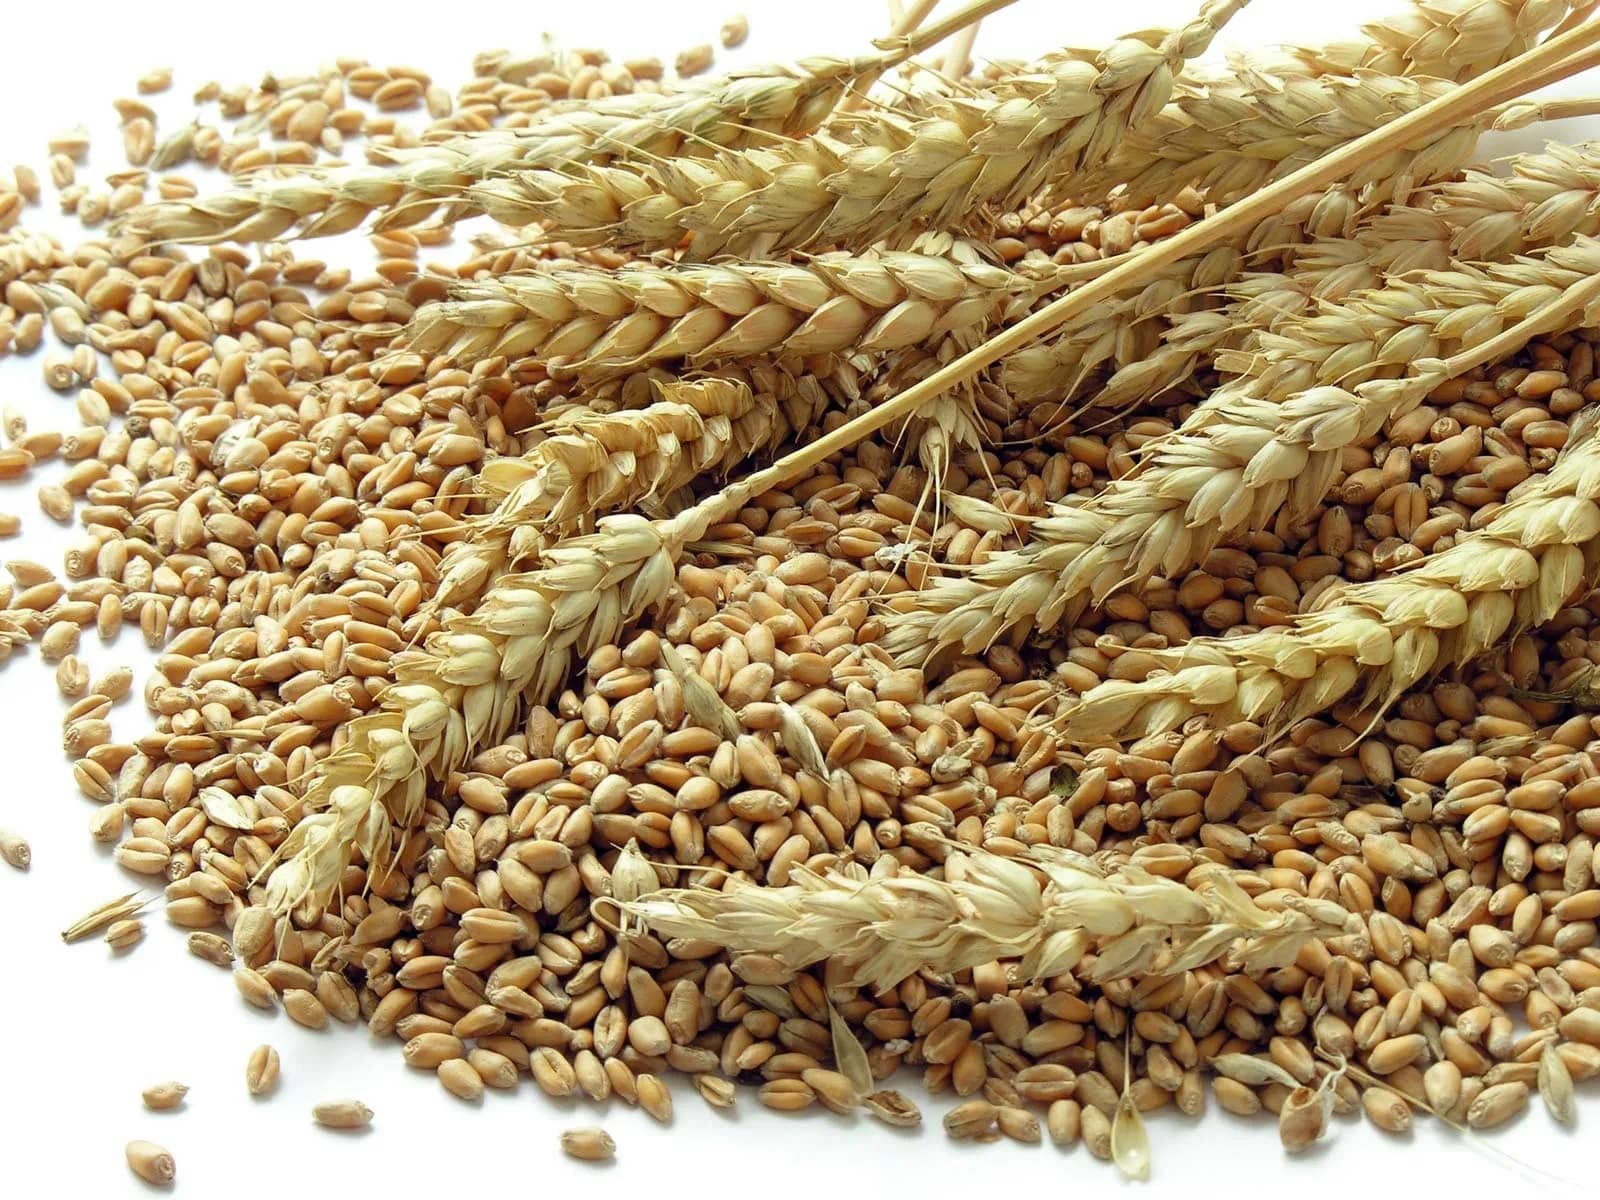


Para construir os dados, foram medidos sete parâmetros geométricos dos grãos de trigo:

* área A,
* perímetro P,
* compacidade C = 4piA/P^2,
* comprimento do grão,
* largura do grão,
* coeficiente de assimetria
* comprimento do sulco do grão.

Todos estes parâmetros são contínuos e de valor real.

Artigo relevante:
* M. Charytanowicz, J. Niewczas, P. Kulczycki, P.A. Kowalski, S. Lukasik, S. Zak, 'A Complete Gradient Clustering Algorithm for Features Analysis of X-ray Images', em: Information Technologies in Biomedicine, Ewa Pietka, Jacek Kawa (eds.), Springer-Verlag, Berlin-Heidelberg, 2010, pp. 15-24.


Nesta atividade, vamos realizar a comparação do método de agrupamento de k-Means usando o pacote scikit-learn.

1. Baixe o conjunto de dados dados de propriedades de sementes de três variedades diferentes de trigo do site https://www.openml.org/search?type=data&sort=runs&id=1499&status=active. Os dados possuem 210 instâncias com 8 atributos cada.

2. Verifique as correlações entre atributos e elimine os atributos dependente. Use somente 4 atributos que tem correlação média menor. Faça a normalização dos atributos independentes.

3. Avalie o algoritmo K-Means com diferentes valores de n_clusters.


4. Faça uma comparação do comportamento dos dados com as modificações dos parâmetros em relação ao experimento inicial. Busque variar as técnicas já conhecidas para esse experimento.

5. Realize agrupamento k-Means (usando sklearn.cluster.KMeans) supondo 3 grupos e pontos centrais inicias aleatórios.  Discute como melhorar a escolha dos centroids iniciais. Faça um agrupamento supondo 4 grupos. Calcule as medidas agrupamentos em 3 e 4 grupos e determine qual número de grupo é correto baseado no SSE. Use a biblioteca scipy para as avaliações e faça uma comparação nos resultados.